In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
import scipy
from matplotlib import colors

import FAIRStream

In [2]:
# csv pool folder directory
csv_pool_path = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/csv_pool'
# current experiment working directory
work_dir = '/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp'

In [3]:
# initiate a FAIRStream object instance for BSI project
bsi_stream = FAIRStream.FAIRStream(work_dir)
# take a look at dictionaries in engineer's hands
#bsi_stream.engineer.csv_source_dict
bsi_stream.engineer.variable_dict

Success: Querier has initiated a csv source dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/csv_source_dict_demo.json
Success: Querier has initiated a variable dictionary in:/Users/jiaxingqiu/Documents/CAMA_projects/BSI/code/projects/case_txp/meta_data/variable_dict_demo.json
Unable to read sql source dictionary. Use Querier.update_sql_source_dict() to build one.


{'__uid': {'src_names': ['id', 'ID', 'subject_id', 'subject_id'],
  'label': 'unique subject id for current study',
  'unique_per_sbj': True},
 '__time': {'src_names': ['tsa', 'tsa', 'timeMinutes', 'timeMinutes'],
  'label': 'time since admission',
  'unit': 'minute'},
 '__anchor': {'src_names': ['True_positive', 'True positive'],
  'label': 'anchor for an episode',
  'unique_per_sbj': False,
  'factor': {'levels': {'__neg_nbc': ['0', '0.0', 'nan'],
    '__pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': '__neg_nbc'}}},
 'y': {'output': True,
  'src_names': ['True_positive', 'True positive'],
  'label': 'Event outcome result',
  'unique_per_sbj': False,
  'factor': {'levels': {'neg_nbc': ['0', '0.0', 'nan'], 'pos': ['1', '1.0']},
   'impute_per_sbj': {'nan_level': 'neg_nbc'}}},
 'txp': {'input': True,
  'src_names': ['Confirmed Txp'],
  'label': 'Transplant recipient',
  'unique_per_sbj': True,
  'factor': {'levels': {'no': ['0', '0.0', 'nan'], 'yes': ['1', '1.0']},
   'impute_p

In [4]:
# define an episode (notice that the engineer now has new attributes)
bsi_stream.engineer.DefineEpisode(input_time_len=2*24*60, # using vital signs and labs 4 days prior to a culture 
                                  output_time_len=24*60, # predict one time unit into the future
                                  time_resolution=60, # aggregate minutely data to one row per hour 
                                  time_lag=0,  # no time lag between predictors and response
                                  anchor_gap=7*24*60) # the minimum distance between two episodes

 
Success! An episode is defined to 
--- use 2880 minute(s) long input variables 
--- predict 1440 minute(s) response variables into the future
--- lag 0 minute(s) between predictors and responses
--- increase by every 60 minute(s)
--- last at most 10080 minute(s) long
Success! Engineer has updated attributes --- episode. 


In [7]:
# Build MVTS dataframe or tfds  (notice that the engineer now has new attributes)
bsi_stream.engineer.BuildMVTS(csv_pool_path, 
                              nsbj = 10000, # number of subjects / patients to sample from the pool 
                              replace=True,
                              valid_frac = 0.2, # fraction of number of subjects in validation dataset
                              test_frac = 0, # fraction of number of subjects in left-out test dataset
                              batch_size = 64, # batch size (usually 32,64,128..)
                              impute_input='median', # imputation on predictors
                              impute_output='median' )# imputation on response (no need in BSI project)

# please see the end of console 
# # --- Success! Engineer has updated attributes --- train_df_imputed, valid_df_imputed and test_df_imputed. 
# # --- Success! Engineer has updated attributes --- train_tfds, valid_tfds and test_tfds. 

Engineer is sampling with replacement --- 
Success!  5671 out of 5671 subjects are sampled from csv pool of size 26093 !
--- fix upper boundary for age by nan
--- fix lower boundary for age by nan
--- fix upper boundary for temp by nan
--- fix lower boundary for temp by nan
--- fix upper boundary for heart_rate by nan
--- fix lower boundary for heart_rate by nan
--- fix upper boundary for resp_rate by nan
--- fix lower boundary for resp_rate by nan
--- fix upper boundary for spo2 by nan
--- fix lower boundary for spo2 by nan
--- fix upper boundary for x_hr_rr by nan
--- fix lower boundary for x_hr_rr by nan
--- fix upper boundary for s_hr by nan
--- fix lower boundary for s_hr by nan
--- fix upper boundary for s_rr by nan
--- fix lower boundary for s_rr by nan
--- fix upper boundary for s_so2 by nan
--- fix lower boundary for s_so2 by nan
--- fix upper boundary for systolic_blood_pressure by nan
--- fix lower boundary for systolic_blood_pressure by nan
--- fix upper boundary for diasto

--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_1799
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_909
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_5968
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_9670
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_833
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_3485
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_1015
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_3141
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_6255
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_4307
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_8885
--- fix out-of-dictionry level/orders --- [' ']--- with NA for subject ---uva_7270
--- fi

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.818182
y___pos        0.181818
dtype: float64
--- prepare episodes for uva_6988
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.822222
y___pos        0.177778
dtype: float64
--- prepare episodes for uva_4192
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.826087
y___pos        0.173913
dtype: float64
--- prepare episodes for uva_7853
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.833333
y___pos        0.166667
dtype: float64
--- prepare episodes for uva_9190
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.836735
y___pos        0.163265
dtype: float64
--- prepare episodes for uva_5769
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.84
y___pos        0.16
dtype: float64
--- prepare episodes for uva_8349
Success! Out

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.850467
y___pos        0.149533
dtype: float64
--- prepare episodes for uva_7407
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.851852
y___pos        0.148148
dtype: float64
--- prepare episodes for uva_3903
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.853211
y___pos        0.146789
dtype: float64
--- prepare episodes for uva_2355
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.854545
y___pos        0.145455
dtype: float64
--- prepare episodes for uva_2074
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.855856
y___pos        0.144144
dtype: float64
--- prepare episodes for uva_3186
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.857143
y___pos        0.142857
dtype: float64
--- prepare episodes for uva_4628
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.88125
y___pos        0.11875
dtype: float64
--- prepare episodes for uva_433
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.881988
y___pos        0.118012
dtype: float64
--- prepare episodes for uva_5333
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.882716
y___pos        0.117284
dtype: float64
--- prepare episodes for uva_3382
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.883436
y___pos        0.116564
dtype: float64
--- prepare episodes for uva_6753
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.884146
y___pos        0.115854
dtype: float64
--- prepare episodes for uva_1693
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.884848
y___pos        0.115152
dtype: float64
--- prepare episodes for uva_4078
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.890995
y___pos        0.109005
dtype: float64
--- prepare episodes for uva_5536
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.887324
y___pos        0.112676
dtype: float64
--- prepare episodes for uva_9700
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.883721
y___pos        0.116279
dtype: float64
--- prepare episodes for uva_215
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.884259
y___pos        0.115741
dtype: float64
--- prepare episodes for uva_6697
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.884793
y___pos        0.115207
dtype: float64
--- prepare episodes for uva_2187
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.885321
y___pos        0.114679
dtype: float64
--- prepare episodes for uva_8994
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.881041
y___pos        0.118959
dtype: float64
--- prepare episodes for uva_3205
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.881481
y___pos        0.118519
dtype: float64
--- prepare episodes for uva_1492
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.881919
y___pos        0.118081
dtype: float64
--- prepare episodes for uva_8356
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.882353
y___pos        0.117647
dtype: float64
--- prepare episodes for uva_8787
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.882784
y___pos        0.117216
dtype: float64
--- prepare episodes for uva_5288
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.883212
y___pos        0.116788
dtype: float64
--- prepare episodes for uva_2632
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.875
y___pos        0.125
dtype: float64
--- prepare episodes for uva_611
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87538
y___pos        0.12462
dtype: float64
--- prepare episodes for uva_2780
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.875758
y___pos        0.124242
dtype: float64
--- prepare episodes for uva_8651
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.876133
y___pos        0.123867
dtype: float64
--- prepare episodes for uva_8304
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873874
y___pos        0.126126
dtype: float64
--- prepare episodes for uva_5666
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874251
y___pos        0.125749
dtype: float64
--- prepare episodes for uva_6209
Success! Outp

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.879581
y___pos        0.120419
dtype: float64
--- prepare episodes for uva_4048
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.879896
y___pos        0.120104
dtype: float64
--- prepare episodes for uva_5093
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880208
y___pos        0.119792
dtype: float64
--- prepare episodes for uva_8397
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880519
y___pos        0.119481
dtype: float64
--- prepare episodes for uva_5037
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880829
y___pos        0.119171
dtype: float64
--- prepare episodes for uva_1974
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.878553
y___pos        0.121447
dtype: float64
--- prepare episodes for uva_5694
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.879545
y___pos        0.120455
dtype: float64
--- prepare episodes for uva_7908
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.879819
y___pos        0.120181
dtype: float64
--- prepare episodes for uva_1485
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.88009
y___pos        0.11991
dtype: float64
--- prepare episodes for uva_5917
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880361
y___pos        0.119639
dtype: float64
--- prepare episodes for uva_4259
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880631
y___pos        0.119369
dtype: float64
--- prepare episodes for uva_6942
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.880899
y___pos        0.119101
dtype: float64
--- prepare episodes for uva_7434
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.869739
y___pos        0.130261
dtype: float64
--- prepare episodes for uva_3066
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87
y___pos        0.13
dtype: float64
--- prepare episodes for uva_8636
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870259
y___pos        0.129741
dtype: float64
--- prepare episodes for uva_2234
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870518
y___pos        0.129482
dtype: float64
--- prepare episodes for uva_2021
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870775
y___pos        0.129225
dtype: float64
--- prepare episodes for uva_4484
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871032
y___pos        0.128968
dtype: float64
--- prepare episodes for uva_5340
Success! Out

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873418
y___pos        0.126582
dtype: float64
--- prepare episodes for uva_9485
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873646
y___pos        0.126354
dtype: float64
--- prepare episodes for uva_2668
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873874
y___pos        0.126126
dtype: float64
--- prepare episodes for uva_4674
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87276
y___pos        0.12724
dtype: float64
--- prepare episodes for uva_8242
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872987
y___pos        0.127013
dtype: float64
--- prepare episodes for uva_3445
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873214
y___pos        0.126786
dtype: float64
--- prepare episodes for uva_9429
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87034
y___pos        0.12966
dtype: float64
--- prepare episodes for uva_5867
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87055
y___pos        0.12945
dtype: float64
--- prepare episodes for uva_9001
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870759
y___pos        0.129241
dtype: float64
--- prepare episodes for uva_7913
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870968
y___pos        0.129032
dtype: float64
--- prepare episodes for uva_8764
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871176
y___pos        0.128824
dtype: float64
--- prepare episodes for uva_1081
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871383
y___pos        0.128617
dtype: float64
--- prepare episodes for uva_7770
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874074
y___pos        0.125926
dtype: float64
--- prepare episodes for uva_8153
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87426
y___pos        0.12574
dtype: float64
--- prepare episodes for uva_234
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874446
y___pos        0.125554
dtype: float64
--- prepare episodes for uva_6785
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874631
y___pos        0.125369
dtype: float64
--- prepare episodes for uva_2889
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874816
y___pos        0.125184
dtype: float64
--- prepare episodes for uva_6864
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.875
y___pos        0.125
dtype: float64
--- prepare episodes for uva_7806
Success! Outp

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873297
y___pos        0.126703
dtype: float64
--- prepare episodes for uva_6931
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873469
y___pos        0.126531
dtype: float64
--- prepare episodes for uva_1722
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873641
y___pos        0.126359
dtype: float64
--- prepare episodes for uva_5459
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873813
y___pos        0.126187
dtype: float64
--- prepare episodes for uva_6125
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873984
y___pos        0.126016
dtype: float64
--- prepare episodes for uva_8965
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874154
y___pos        0.125846
dtype: float64
--- prepare episodes for uva_6615
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873275
y___pos        0.126725
dtype: float64
--- prepare episodes for uva_2926
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873434
y___pos        0.126566
dtype: float64
--- prepare episodes for uva_442
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873592
y___pos        0.126408
dtype: float64
--- prepare episodes for uva_1134
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87375
y___pos        0.12625
dtype: float64
--- prepare episodes for uva_2577
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873908
y___pos        0.126092
dtype: float64
--- prepare episodes for uva_8194
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874065
y___pos        0.125935
dtype: float64
--- prepare episodes for uva_8113
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874266
y___pos        0.125734
dtype: float64
--- prepare episodes for uva_3566
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874413
y___pos        0.125587
dtype: float64
--- prepare episodes for uva_338
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87456
y___pos        0.12544
dtype: float64
--- prepare episodes for uva_556
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874707
y___pos        0.125293
dtype: float64
--- prepare episodes for uva_328
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874854
y___pos        0.125146
dtype: float64
--- prepare episodes for uva_2968
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.875
y___pos        0.125
dtype: float64
--- prepare episodes for uva_5776
Success! Output

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873208
y___pos        0.126792
dtype: float64
--- prepare episodes for uva_3794
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873348
y___pos        0.126652
dtype: float64
--- prepare episodes for uva_6067
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873487
y___pos        0.126513
dtype: float64
--- prepare episodes for uva_6671
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873626
y___pos        0.126374
dtype: float64
--- prepare episodes for uva_4739
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873765
y___pos        0.126235
dtype: float64
--- prepare episodes for uva_5942
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873904
y___pos        0.126096
dtype: float64
--- prepare episodes for uva_2511
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873575
y___pos        0.126425
dtype: float64
--- prepare episodes for uva_4863
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872802
y___pos        0.127198
dtype: float64
--- prepare episodes for uva_8127
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872934
y___pos        0.127066
dtype: float64
--- prepare episodes for uva_5820
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873065
y___pos        0.126935
dtype: float64
--- prepare episodes for uva_7565
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873326
y___pos        0.126674
dtype: float64
--- prepare episodes for uva_1129
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873457
y___pos        0.126543
dtype: float64
--- prepare episodes for uva_4026
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873529
y___pos        0.126471
dtype: float64
--- prepare episodes for uva_7613
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873653
y___pos        0.126347
dtype: float64
--- prepare episodes for uva_6261
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873777
y___pos        0.126223
dtype: float64
--- prepare episodes for uva_2933
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.8739
y___pos        0.1261
dtype: float64
--- prepare episodes for uva_2587
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874023
y___pos        0.125977
dtype: float64
--- prepare episodes for uva_4183
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.874146
y___pos        0.125854
dtype: float64
--- prepare episodes for uva_354
Success! 

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871058
y___pos        0.128942
dtype: float64
--- prepare episodes for uva_5173
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87049
y___pos        0.12951
dtype: float64
--- prepare episodes for uva_5232
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87061
y___pos        0.12939
dtype: float64
--- prepare episodes for uva_2645
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.869806
y___pos        0.130194
dtype: float64
--- prepare episodes for uva_8942
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.869926
y___pos        0.130074
dtype: float64
--- prepare episodes for uva_1149
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870046
y___pos        0.129954
dtype: float64
--- prepare episodes for uva_9773
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872134
y___pos        0.127866
dtype: float64
--- prepare episodes for uva_400
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872247
y___pos        0.127753
dtype: float64
--- prepare episodes for uva_4099
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872359
y___pos        0.127641
dtype: float64
--- prepare episodes for uva_2198
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871705
y___pos        0.128295
dtype: float64
--- prepare episodes for uva_3273
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871817
y___pos        0.128183
dtype: float64
--- prepare episodes for uva_7875
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87193
y___pos        0.12807
dtype: float64
--- prepare episodes for uva_3041
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873844
y___pos        0.126156
dtype: float64
--- prepare episodes for uva_5419
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.873216
y___pos        0.126784
dtype: float64
--- prepare episodes for uva_5119
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871859
y___pos        0.128141
dtype: float64
--- prepare episodes for uva_5810
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.871967
y___pos        0.128033
dtype: float64
--- prepare episodes for uva_2446
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.872074
y___pos        0.127926
dtype: float64
--- prepare episodes for uva_9259
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.87218
y___pos        0.12782
dtype: float64
--- prepare episodes for uva_4145
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867894
y___pos        0.132106
dtype: float64
--- prepare episodes for uva_8105
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868
y___pos        0.132
dtype: float64
--- prepare episodes for uva_7127
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868106
y___pos        0.131894
dtype: float64
--- prepare episodes for uva_8232
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868211
y___pos        0.131789
dtype: float64
--- prepare episodes for uva_4695
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868316
y___pos        0.131684
dtype: float64
--- prepare episodes for uva_4923
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867624
y___pos        0.132376
dtype: float64
--- prepare episodes for uva_1678
Success! O

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866972
y___pos        0.133028
dtype: float64
--- prepare episodes for uva_1272
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867074
y___pos        0.132926
dtype: float64
--- prepare episodes for uva_6378
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867176
y___pos        0.132824
dtype: float64
--- prepare episodes for uva_680
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867277
y___pos        0.132723
dtype: float64
--- prepare episodes for uva_2377
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867378
y___pos        0.132622
dtype: float64
--- prepare episodes for uva_3206
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866819
y___pos        0.133181
dtype: float64
--- prepare episodes for uva_9758
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867938
y___pos        0.132062
dtype: float64
--- prepare episodes for uva_9375
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868035
y___pos        0.131965
dtype: float64
--- prepare episodes for uva_8018
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868132
y___pos        0.131868
dtype: float64
--- prepare episodes for uva_3016
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868228
y___pos        0.131772
dtype: float64
--- prepare episodes for uva_3074
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868325
y___pos        0.131675
dtype: float64
--- prepare episodes for uva_3584
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868421
y___pos        0.131579
dtype: float64
--- prepare episodes for uva_265
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867182
y___pos        0.132818
dtype: float64
--- prepare episodes for uva_4587
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867275
y___pos        0.132725
dtype: float64
--- prepare episodes for uva_3991
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867368
y___pos        0.132632
dtype: float64
--- prepare episodes for uva_1916
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867461
y___pos        0.132539
dtype: float64
--- prepare episodes for uva_9667
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866947
y___pos        0.133053
dtype: float64
--- prepare episodes for uva_7824
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86704
y___pos        0.13296
dtype: float64
--- prepare episodes for uva_7796
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865591
y___pos        0.134409
dtype: float64
--- prepare episodes for uva_5353
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865682
y___pos        0.134318
dtype: float64
--- prepare episodes for uva_9082
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865772
y___pos        0.134228
dtype: float64
--- prepare episodes for uva_7846
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865862
y___pos        0.134138
dtype: float64
--- prepare episodes for uva_8255
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865952
y___pos        0.134048
dtype: float64
--- prepare episodes for uva_1197
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866042
y___pos        0.133958
dtype: float64
--- prepare episodes for uva_6506
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866193
y___pos        0.133807
dtype: float64
--- prepare episodes for uva_3963
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866279
y___pos        0.133721
dtype: float64
--- prepare episodes for uva_2132
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866365
y___pos        0.133635
dtype: float64
--- prepare episodes for uva_6463
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866452
y___pos        0.133548
dtype: float64
--- prepare episodes for uva_530
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866538
y___pos        0.133462
dtype: float64
--- prepare episodes for uva_878
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866624
y___pos        0.133376
dtype: float64
--- prepare episodes for uva_3646
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865588
y___pos        0.134412
dtype: float64
--- prepare episodes for uva_679
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865672
y___pos        0.134328
dtype: float64
--- prepare episodes for uva_3463
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865755
y___pos        0.134245
dtype: float64
--- prepare episodes for uva_8220
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865839
y___pos        0.134161
dtype: float64
--- prepare episodes for uva_9203
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865922
y___pos        0.134078
dtype: float64
--- prepare episodes for uva_9909
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866005
y___pos        0.133995
dtype: float64
--- prepare episodes for uva_7149
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861227
y___pos        0.138773
dtype: float64
--- prepare episodes for uva_3660
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86131
y___pos        0.13869
dtype: float64
--- prepare episodes for uva_4534
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861392
y___pos        0.138608
dtype: float64
--- prepare episodes for uva_3322
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861474
y___pos        0.138526
dtype: float64
--- prepare episodes for uva_6379
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861557
y___pos        0.138443
dtype: float64
--- prepare episodes for uva_4852
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861639
y___pos        0.138361
dtype: float64
--- prepare episodes for uva_6663
Succes

y___neg_nbc    0.86092
y___pos        0.13908
dtype: float64
--- prepare episodes for uva_3587
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860999
y___pos        0.139001
dtype: float64
--- prepare episodes for uva_3534
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861079
y___pos        0.138921
dtype: float64
--- prepare episodes for uva_4441
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861159
y___pos        0.138841
dtype: float64
--- prepare episodes for uva_806
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861239
y___pos        0.138761
dtype: float64
--- prepare episodes for uva_8108
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861318
y___pos        0.138682
dtype: float64
--- prepare episodes for uva_5395
Success! Output/responce variable mean in current sample space  --- 
y___neg

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859678
y___pos        0.140322
dtype: float64
--- prepare episodes for uva_8724
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859202
y___pos        0.140798
dtype: float64
--- prepare episodes for uva_4455
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.85928
y___pos        0.14072
dtype: float64
--- prepare episodes for uva_8187
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859358
y___pos        0.140642
dtype: float64
--- prepare episodes for uva_5541
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859436
y___pos        0.140564
dtype: float64
--- prepare episodes for uva_3960
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859591
y___pos        0.140409
dtype: float64
--- prepare episodes for uva_3269
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859989
y___pos        0.140011
dtype: float64
--- prepare episodes for uva_350
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859526
y___pos        0.140474
dtype: float64
--- prepare episodes for uva_7498
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859602
y___pos        0.140398
dtype: float64
--- prepare episodes for uva_6577
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859677
y___pos        0.140323
dtype: float64
--- prepare episodes for uva_5385
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859753
y___pos        0.140247
dtype: float64
--- prepare episodes for uva_4768
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.859828
y___pos        0.140172
dtype: float64
--- prepare episodes for uva_4643
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860209
y___pos        0.139791
dtype: float64
--- prepare episodes for uva_9797
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860283
y___pos        0.139717
dtype: float64
--- prepare episodes for uva_2137
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860356
y___pos        0.139644
dtype: float64
--- prepare episodes for uva_1360
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860429
y___pos        0.139571
dtype: float64
--- prepare episodes for uva_6065
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860502
y___pos        0.139498
dtype: float64
--- prepare episodes for uva_1203
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860574
y___pos        0.139426
dtype: float64
--- prepare episodes for uva_7874
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860335
y___pos        0.139665
dtype: float64
--- prepare episodes for uva_8554
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860406
y___pos        0.139594
dtype: float64
--- prepare episodes for uva_9263
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860477
y___pos        0.139523
dtype: float64
--- prepare episodes for uva_6168
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860548
y___pos        0.139452
dtype: float64
--- prepare episodes for uva_1002
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860618
y___pos        0.139382
dtype: float64
--- prepare episodes for uva_857
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860689
y___pos        0.139311
dtype: float64
--- prepare episodes for uva_820
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860603
y___pos        0.139397
dtype: float64
--- prepare episodes for uva_6035
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860178
y___pos        0.139822
dtype: float64
--- prepare episodes for uva_4855
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860247
y___pos        0.139753
dtype: float64
--- prepare episodes for uva_9454
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860316
y___pos        0.139684
dtype: float64
--- prepare episodes for uva_152
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860385
y___pos        0.139615
dtype: float64
--- prepare episodes for uva_2623
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860454
y___pos        0.139546
dtype: float64
--- prepare episodes for uva_1582
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860711
y___pos        0.139289
dtype: float64
--- prepare episodes for uva_3231
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860778
y___pos        0.139222
dtype: float64
--- prepare episodes for uva_8107
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860845
y___pos        0.139155
dtype: float64
--- prepare episodes for uva_3426
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860911
y___pos        0.139089
dtype: float64
--- prepare episodes for uva_3270
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.860978
y___pos        0.139022
dtype: float64
--- prepare episodes for uva_4176
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861045
y___pos        0.138955
dtype: float64
--- prepare episodes for uva_2929
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86115
y___pos        0.13885
dtype: float64
--- prepare episodes for uva_5060
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861215
y___pos        0.138785
dtype: float64
--- prepare episodes for uva_3949
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86128
y___pos        0.13872
dtype: float64
--- prepare episodes for uva_4866
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861345
y___pos        0.138655
dtype: float64
--- prepare episodes for uva_7494
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861409
y___pos        0.138591
dtype: float64
--- prepare episodes for uva_8289
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861474
y___pos        0.138526
dtype: float64
--- prepare episodes for uva_2485
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861755
y___pos        0.138245
dtype: float64
--- prepare episodes for uva_8765
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861818
y___pos        0.138182
dtype: float64
--- prepare episodes for uva_2713
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861881
y___pos        0.138119
dtype: float64
--- prepare episodes for uva_2115
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.861944
y___pos        0.138056
dtype: float64
--- prepare episodes for uva_2504
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862006
y___pos        0.137994
dtype: float64
--- prepare episodes for uva_7471
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862069
y___pos        0.137931
dtype: float64
--- prepare episodes for uva_5635
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864829
y___pos        0.135171
dtype: float64
--- prepare episodes for uva_3085
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864889
y___pos        0.135111
dtype: float64
--- prepare episodes for uva_1389
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864949
y___pos        0.135051
dtype: float64
--- prepare episodes for uva_5426
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865009
y___pos        0.134991
dtype: float64
--- prepare episodes for uva_7204
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865069
y___pos        0.134931
dtype: float64
--- prepare episodes for uva_1850
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865129
y___pos        0.134871
dtype: float64
--- prepare episodes for uva_2741
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862084
y___pos        0.137916
dtype: float64
--- prepare episodes for uva_8742
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862143
y___pos        0.137857
dtype: float64
--- prepare episodes for uva_2580
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862203
y___pos        0.137797
dtype: float64
--- prepare episodes for uva_2765
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862263
y___pos        0.137737
dtype: float64
--- prepare episodes for uva_8064
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862322
y___pos        0.137678
dtype: float64
--- prepare episodes for uva_7919
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862381
y___pos        0.137619
dtype: float64
--- prepare episodes for uva_8366
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862811
y___pos        0.137189
dtype: float64
--- prepare episodes for uva_8057
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862869
y___pos        0.137131
dtype: float64
--- prepare episodes for uva_3601
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862927
y___pos        0.137073
dtype: float64
--- prepare episodes for uva_3054
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862985
y___pos        0.137015
dtype: float64
--- prepare episodes for uva_7162
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863043
y___pos        0.136957
dtype: float64
--- prepare episodes for uva_1257
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.8631
y___pos        0.1369
dtype: float64
--- prepare episodes for uva_7376
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862211
y___pos        0.137789
dtype: float64
--- prepare episodes for uva_2524
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862268
y___pos        0.137732
dtype: float64
--- prepare episodes for uva_4622
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86197
y___pos        0.13803
dtype: float64
--- prepare episodes for uva_8143
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862026
y___pos        0.137974
dtype: float64
--- prepare episodes for uva_1128
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.862083
y___pos        0.137917
dtype: float64
--- prepare episodes for uva_5772
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86214
y___pos        0.13786
dtype: float64
--- prepare episodes for uva_6288
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863306
y___pos        0.136694
dtype: float64
--- prepare episodes for uva_1381
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863362
y___pos        0.136638
dtype: float64
--- prepare episodes for uva_8037
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863417
y___pos        0.136583
dtype: float64
--- prepare episodes for uva_1808
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863472
y___pos        0.136528
dtype: float64
--- prepare episodes for uva_1135
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863527
y___pos        0.136473
dtype: float64
--- prepare episodes for uva_2646
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863581
y___pos        0.136419
dtype: float64
--- prepare episodes for uva_1663
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865377
y___pos        0.134623
dtype: float64
--- prepare episodes for uva_6272
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86543
y___pos        0.13457
dtype: float64
--- prepare episodes for uva_7422
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865483
y___pos        0.134517
dtype: float64
--- prepare episodes for uva_1680
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865536
y___pos        0.134464
dtype: float64
--- prepare episodes for uva_1977
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865589
y___pos        0.134411
dtype: float64
--- prepare episodes for uva_9086
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865642
y___pos        0.134358
dtype: float64
--- prepare episodes for uva_7566
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866023
y___pos        0.133977
dtype: float64
--- prepare episodes for uva_8655
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866075
y___pos        0.133925
dtype: float64
--- prepare episodes for uva_4304
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866127
y___pos        0.133873
dtype: float64
--- prepare episodes for uva_8874
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866178
y___pos        0.133822
dtype: float64
--- prepare episodes for uva_9016
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86623
y___pos        0.13377
dtype: float64
--- prepare episodes for uva_9869
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866281
y___pos        0.133719
dtype: float64
--- prepare episodes for uva_3882
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865987
y___pos        0.134013
dtype: float64
--- prepare episodes for uva_682
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866038
y___pos        0.133962
dtype: float64
--- prepare episodes for uva_9466
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866088
y___pos        0.133912
dtype: float64
--- prepare episodes for uva_7050
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866139
y___pos        0.133861
dtype: float64
--- prepare episodes for uva_7094
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866189
y___pos        0.133811
dtype: float64
--- prepare episodes for uva_3064
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86624
y___pos        0.13376
dtype: float64
--- prepare episodes for uva_4488
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865754
y___pos        0.134246
dtype: float64
--- prepare episodes for uva_6491
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865804
y___pos        0.134196
dtype: float64
--- prepare episodes for uva_7808
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865854
y___pos        0.134146
dtype: float64
--- prepare episodes for uva_5482
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865903
y___pos        0.134097
dtype: float64
--- prepare episodes for uva_8231
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865953
y___pos        0.134047
dtype: float64
--- prepare episodes for uva_962
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866002
y___pos        0.133998
dtype: float64
--- prepare episodes for uva_2143
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867151
y___pos        0.132849
dtype: float64
--- prepare episodes for uva_2201
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866836
y___pos        0.133164
dtype: float64
--- prepare episodes for uva_5605
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866884
y___pos        0.133116
dtype: float64
--- prepare episodes for uva_9463
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866618
y___pos        0.133382
dtype: float64
--- prepare episodes for uva_1380
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866401
y___pos        0.133599
dtype: float64
--- prepare episodes for uva_6312
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86645
y___pos        0.13355
dtype: float64
--- prepare episodes for uva_6819
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86726
y___pos        0.13274
dtype: float64
--- prepare episodes for uva_9045
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867307
y___pos        0.132693
dtype: float64
--- prepare episodes for uva_8829
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866999
y___pos        0.133001
dtype: float64
--- prepare episodes for uva_4887
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867046
y___pos        0.132954
dtype: float64
--- prepare episodes for uva_8406
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867093
y___pos        0.132907
dtype: float64
--- prepare episodes for uva_2552
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86714
y___pos        0.13286
dtype: float64
--- prepare episodes for uva_849
Success! 

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866853
y___pos        0.133147
dtype: float64
--- prepare episodes for uva_5928
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866899
y___pos        0.133101
dtype: float64
--- prepare episodes for uva_1130
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866945
y___pos        0.133055
dtype: float64
--- prepare episodes for uva_6927
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866992
y___pos        0.133008
dtype: float64
--- prepare episodes for uva_499
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867038
y___pos        0.132962
dtype: float64
--- prepare episodes for uva_6370
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867084
y___pos        0.132916
dtype: float64
--- prepare episodes for uva_1691
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867944
y___pos        0.132056
dtype: float64
--- prepare episodes for uva_6442
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867989
y___pos        0.132011
dtype: float64
--- prepare episodes for uva_423
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868034
y___pos        0.131966
dtype: float64
--- prepare episodes for uva_5725
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868079
y___pos        0.131921
dtype: float64
--- prepare episodes for uva_6136
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868124
y___pos        0.131876
dtype: float64
--- prepare episodes for uva_7968
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868169
y___pos        0.131831
dtype: float64
--- prepare episodes for uva_6586
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86783
y___pos        0.13217
dtype: float64
--- prepare episodes for uva_8667
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867874
y___pos        0.132126
dtype: float64
--- prepare episodes for uva_6137
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867918
y___pos        0.132082
dtype: float64
--- prepare episodes for uva_7250
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867962
y___pos        0.132038
dtype: float64
--- prepare episodes for uva_6909
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868007
y___pos        0.131993
dtype: float64
--- prepare episodes for uva_5739
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868051
y___pos        0.131949
dtype: float64
--- prepare episodes for uva_3052
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867434
y___pos        0.132566
dtype: float64
--- prepare episodes for uva_9653
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867193
y___pos        0.132807
dtype: float64
--- prepare episodes for uva_4200
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867236
y___pos        0.132764
dtype: float64
--- prepare episodes for uva_4918
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86728
y___pos        0.13272
dtype: float64
--- prepare episodes for uva_6054
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867323
y___pos        0.132677
dtype: float64
--- prepare episodes for uva_7675
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867367
y___pos        0.132633
dtype: float64
--- prepare episodes for uva_6594
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868736
y___pos        0.131264
dtype: float64
--- prepare episodes for uva_9253
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868778
y___pos        0.131222
dtype: float64
--- prepare episodes for uva_5359
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868821
y___pos        0.131179
dtype: float64
--- prepare episodes for uva_9660
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868863
y___pos        0.131137
dtype: float64
--- prepare episodes for uva_2875
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868625
y___pos        0.131375
dtype: float64
--- prepare episodes for uva_4064
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868667
y___pos        0.131333
dtype: float64
--- prepare episodes for uva_8020
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86853
y___pos        0.13147
dtype: float64
--- prepare episodes for uva_4117
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868571
y___pos        0.131429
dtype: float64
--- prepare episodes for uva_6301
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868613
y___pos        0.131387
dtype: float64
--- prepare episodes for uva_2333
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868655
y___pos        0.131345
dtype: float64
--- prepare episodes for uva_8890
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868696
y___pos        0.131304
dtype: float64
--- prepare episodes for uva_1304
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868738
y___pos        0.131262
dtype: float64
--- prepare episodes for uva_4184
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870081
y___pos        0.129919
dtype: float64
--- prepare episodes for uva_5623
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870122
y___pos        0.129878
dtype: float64
--- prepare episodes for uva_8735
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870162
y___pos        0.129838
dtype: float64
--- prepare episodes for uva_7380
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.870203
y___pos        0.129797
dtype: float64
--- prepare episodes for uva_4278
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868282
y___pos        0.131718
dtype: float64
--- prepare episodes for uva_2804
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868323
y___pos        0.131677
dtype: float64
--- prepare episodes for uva_3365
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868236
y___pos        0.131764
dtype: float64
--- prepare episodes for uva_1432
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868276
y___pos        0.131724
dtype: float64
--- prepare episodes for uva_2413
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868051
y___pos        0.131949
dtype: float64
--- prepare episodes for uva_1283
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868092
y___pos        0.131908
dtype: float64
--- prepare episodes for uva_8379
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868132
y___pos        0.131868
dtype: float64
--- prepare episodes for uva_3603
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.868172
y___pos        0.131828
dtype: float64
--- prepare episodes for uva_5788
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867528
y___pos        0.132472
dtype: float64
--- prepare episodes for uva_1107
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867568
y___pos        0.132432
dtype: float64
--- prepare episodes for uva_4694
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867607
y___pos        0.132393
dtype: float64
--- prepare episodes for uva_8284
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867647
y___pos        0.132353
dtype: float64
--- prepare episodes for uva_2089
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867387
y___pos        0.132613
dtype: float64
--- prepare episodes for uva_4979
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867427
y___pos        0.132573
dtype: float64
--- prepare episodes for uva_5233
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867395
y___pos        0.132605
dtype: float64
--- prepare episodes for uva_2046
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867178
y___pos        0.132822
dtype: float64
--- prepare episodes for uva_2793
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867217
y___pos        0.132783
dtype: float64
--- prepare episodes for uva_5126
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867257
y___pos        0.132743
dtype: float64
--- prepare episodes for uva_210
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867296
y___pos        0.132704
dtype: float64
--- prepare episodes for uva_4704
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867335
y___pos        0.132665
dtype: float64
--- prepare episodes for uva_7087
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867519
y___pos        0.132481
dtype: float64
--- prepare episodes for uva_6603
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867557
y___pos        0.132443
dtype: float64
--- prepare episodes for uva_1006
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867596
y___pos        0.132404
dtype: float64
--- prepare episodes for uva_9570
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867634
y___pos        0.132366
dtype: float64
--- prepare episodes for uva_4507
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867673
y___pos        0.132327
dtype: float64
--- prepare episodes for uva_1050
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867711
y___pos        0.132289
dtype: float64
--- prepare episodes for uva_5935
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867676
y___pos        0.132324
dtype: float64
--- prepare episodes for uva_9939
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867714
y___pos        0.132286
dtype: float64
--- prepare episodes for uva_1241
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867466
y___pos        0.132534
dtype: float64
--- prepare episodes for uva_1374
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867504
y___pos        0.132496
dtype: float64
--- prepare episodes for uva_267
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.867542
y___pos        0.132458
dtype: float64
--- prepare episodes for uva_9300
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86758
y___pos        0.13242
dtype: float64
--- prepare episodes for uva_3282
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866312
y___pos        0.133688
dtype: float64
--- prepare episodes for uva_6192
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866349
y___pos        0.133651
dtype: float64
--- prepare episodes for uva_3062
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866387
y___pos        0.133613
dtype: float64
--- prepare episodes for uva_3239
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866424
y___pos        0.133576
dtype: float64
--- prepare episodes for uva_5457
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866461
y___pos        0.133539
dtype: float64
--- prepare episodes for uva_6271
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866499
y___pos        0.133501
dtype: float64
--- prepare episodes for uva_6291
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866005
y___pos        0.133995
dtype: float64
--- prepare episodes for uva_5854
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86584
y___pos        0.13416
dtype: float64
--- prepare episodes for uva_9129
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865877
y___pos        0.134123
dtype: float64
--- prepare episodes for uva_984
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865639
y___pos        0.134361
dtype: float64
--- prepare episodes for uva_3487
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865676
y___pos        0.134324
dtype: float64
--- prepare episodes for uva_2707
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865713
y___pos        0.134287
dtype: float64
--- prepare episodes for uva_5102
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865312
y___pos        0.134688
dtype: float64
--- prepare episodes for uva_2400
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865348
y___pos        0.134652
dtype: float64
--- prepare episodes for uva_2649
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865385
y___pos        0.134615
dtype: float64
--- prepare episodes for uva_6322
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865421
y___pos        0.134579
dtype: float64
--- prepare episodes for uva_7019
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865457
y___pos        0.134543
dtype: float64
--- prepare episodes for uva_5755
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865494
y___pos        0.134506
dtype: float64
--- prepare episodes for uva_9544
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86615
y___pos        0.13385
dtype: float64
--- prepare episodes for uva_256
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866186
y___pos        0.133814
dtype: float64
--- prepare episodes for uva_5630
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866222
y___pos        0.133778
dtype: float64
--- prepare episodes for uva_3435
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866257
y___pos        0.133743
dtype: float64
--- prepare episodes for uva_468
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866098
y___pos        0.133902
dtype: float64
--- prepare episodes for uva_6075
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866133
y___pos        0.133867
dtype: float64
--- prepare episodes for uva_9209
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865931
y___pos        0.134069
dtype: float64
--- prepare episodes for uva_4700
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865966
y___pos        0.134034
dtype: float64
--- prepare episodes for uva_7031
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866001
y___pos        0.133999
dtype: float64
--- prepare episodes for uva_4943
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866036
y___pos        0.133964
dtype: float64
--- prepare episodes for uva_3651
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866071
y___pos        0.133929
dtype: float64
--- prepare episodes for uva_5900
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866107
y___pos        0.133893
dtype: float64
--- prepare episodes for uva_8368
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864683
y___pos        0.135317
dtype: float64
--- prepare episodes for uva_4267
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864459
y___pos        0.135541
dtype: float64
--- prepare episodes for uva_5624
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864494
y___pos        0.135506
dtype: float64
--- prepare episodes for uva_8462
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864341
y___pos        0.135659
dtype: float64
--- prepare episodes for uva_351
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864376
y___pos        0.135624
dtype: float64
--- prepare episodes for uva_2410
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864411
y___pos        0.135589
dtype: float64
--- prepare episodes for uva_4262
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865085
y___pos        0.134915
dtype: float64
--- prepare episodes for uva_9124
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86512
y___pos        0.13488
dtype: float64
--- prepare episodes for uva_1715
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865154
y___pos        0.134846
dtype: float64
--- prepare episodes for uva_9028
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865189
y___pos        0.134811
dtype: float64
--- prepare episodes for uva_655
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865223
y___pos        0.134777
dtype: float64
--- prepare episodes for uva_5566
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865257
y___pos        0.134743
dtype: float64
--- prepare episodes for uva_9852
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865728
y___pos        0.134272
dtype: float64
--- prepare episodes for uva_6398
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865762
y___pos        0.134238
dtype: float64
--- prepare episodes for uva_7818
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865578
y___pos        0.134422
dtype: float64
--- prepare episodes for uva_6166
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865612
y___pos        0.134388
dtype: float64
--- prepare episodes for uva_4873
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865428
y___pos        0.134572
dtype: float64
--- prepare episodes for uva_2098
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865462
y___pos        0.134538
dtype: float64
--- prepare episodes for uva_9757
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864356
y___pos        0.135644
dtype: float64
--- prepare episodes for uva_2207
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86439
y___pos        0.13561
dtype: float64
--- prepare episodes for uva_2496
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864424
y___pos        0.135576
dtype: float64
--- prepare episodes for uva_718
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864457
y___pos        0.135543
dtype: float64
--- prepare episodes for uva_6256
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864491
y___pos        0.135509
dtype: float64
--- prepare episodes for uva_6742
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864524
y___pos        0.135476
dtype: float64
--- prepare episodes for uva_9107
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863481
y___pos        0.136519
dtype: float64
--- prepare episodes for uva_2438
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863515
y___pos        0.136485
dtype: float64
--- prepare episodes for uva_7811
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863548
y___pos        0.136452
dtype: float64
--- prepare episodes for uva_9296
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863371
y___pos        0.136629
dtype: float64
--- prepare episodes for uva_9530
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863404
y___pos        0.136596
dtype: float64
--- prepare episodes for uva_4253
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863227
y___pos        0.136773
dtype: float64
--- prepare episodes for uva_7866
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864052
y___pos        0.135948
dtype: float64
--- prepare episodes for uva_8707
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864085
y___pos        0.135915
dtype: float64
--- prepare episodes for uva_4419
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864117
y___pos        0.135883
dtype: float64
--- prepare episodes for uva_2871
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86415
y___pos        0.13585
dtype: float64
--- prepare episodes for uva_6765
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864183
y___pos        0.135817
dtype: float64
--- prepare episodes for uva_8434
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864215
y___pos        0.135785
dtype: float64
--- prepare episodes for uva_2711
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864846
y___pos        0.135154
dtype: float64
--- prepare episodes for uva_2659
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864878
y___pos        0.135122
dtype: float64
--- prepare episodes for uva_7735
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864704
y___pos        0.135296
dtype: float64
--- prepare episodes for uva_2001
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864737
y___pos        0.135263
dtype: float64
--- prepare episodes for uva_9015
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864531
y___pos        0.135469
dtype: float64
--- prepare episodes for uva_7817
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864564
y___pos        0.135436
dtype: float64
--- prepare episodes for uva_7775
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864776
y___pos        0.135224
dtype: float64
--- prepare episodes for uva_4323
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864808
y___pos        0.135192
dtype: float64
--- prepare episodes for uva_3485
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86484
y___pos        0.13516
dtype: float64
--- prepare episodes for uva_1708
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864871
y___pos        0.135129
dtype: float64
--- prepare episodes for uva_9841
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.8647
y___pos        0.1353
dtype: float64
--- prepare episodes for uva_8837
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864732
y___pos        0.135268
dtype: float64
--- prepare episodes for uva_8649
Success! O

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864971
y___pos        0.135029
dtype: float64
--- prepare episodes for uva_3386
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865002
y___pos        0.134998
dtype: float64
--- prepare episodes for uva_5001
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865034
y___pos        0.134966
dtype: float64
--- prepare episodes for uva_3959
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865065
y___pos        0.134935
dtype: float64
--- prepare episodes for uva_2873
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865096
y___pos        0.134904
dtype: float64
--- prepare episodes for uva_6517
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865127
y___pos        0.134873
dtype: float64
--- prepare episodes for uva_6640
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865617
y___pos        0.134383
dtype: float64
--- prepare episodes for uva_6812
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865648
y___pos        0.134352
dtype: float64
--- prepare episodes for uva_829
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865678
y___pos        0.134322
dtype: float64
--- prepare episodes for uva_8495
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865709
y___pos        0.134291
dtype: float64
--- prepare episodes for uva_6126
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86574
y___pos        0.13426
dtype: float64
--- prepare episodes for uva_7334
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86577
y___pos        0.13423
dtype: float64
--- prepare episodes for uva_3156
Success! 

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865766
y___pos        0.134234
dtype: float64
--- prepare episodes for uva_2095
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865796
y___pos        0.134204
dtype: float64
--- prepare episodes for uva_5279
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865826
y___pos        0.134174
dtype: float64
--- prepare episodes for uva_6689
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865692
y___pos        0.134308
dtype: float64
--- prepare episodes for uva_8572
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865722
y___pos        0.134278
dtype: float64
--- prepare episodes for uva_1293
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865752
y___pos        0.134248
dtype: float64
--- prepare episodes for uva_4204
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865321
y___pos        0.134679
dtype: float64
--- prepare episodes for uva_8932
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86535
y___pos        0.13465
dtype: float64
--- prepare episodes for uva_6679
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86538
y___pos        0.13462
dtype: float64
--- prepare episodes for uva_856
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86541
y___pos        0.13459
dtype: float64
--- prepare episodes for uva_2305
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86544
y___pos        0.13456
dtype: float64
--- prepare episodes for uva_5016
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86547
y___pos        0.13453
dtype: float64
--- prepare episodes for uva_2610
Success! Output

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865149
y___pos        0.134851
dtype: float64
--- prepare episodes for uva_7754
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864989
y___pos        0.135011
dtype: float64
--- prepare episodes for uva_2819
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865019
y___pos        0.134981
dtype: float64
--- prepare episodes for uva_3876
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865048
y___pos        0.134952
dtype: float64
--- prepare episodes for uva_5705
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864859
y___pos        0.135141
dtype: float64
--- prepare episodes for uva_3089
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864889
y___pos        0.135111
dtype: float64
--- prepare episodes for uva_1344
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865239
y___pos        0.134761
dtype: float64
--- prepare episodes for uva_2901
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865268
y___pos        0.134732
dtype: float64
--- prepare episodes for uva_1077
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865297
y___pos        0.134703
dtype: float64
--- prepare episodes for uva_3406
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865326
y___pos        0.134674
dtype: float64
--- prepare episodes for uva_6621
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865356
y___pos        0.134644
dtype: float64
--- prepare episodes for uva_1938
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865385
y___pos        0.134615
dtype: float64
--- prepare episodes for uva_8908
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865755
y___pos        0.134245
dtype: float64
--- prepare episodes for uva_606
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865783
y___pos        0.134217
dtype: float64
--- prepare episodes for uva_4209
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865812
y___pos        0.134188
dtype: float64
--- prepare episodes for uva_5639
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865841
y___pos        0.134159
dtype: float64
--- prepare episodes for uva_3796
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865869
y___pos        0.134131
dtype: float64
--- prepare episodes for uva_5583
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865898
y___pos        0.134102
dtype: float64
--- prepare episodes for uva_9394
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865247
y___pos        0.134753
dtype: float64
--- prepare episodes for uva_6129
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865275
y___pos        0.134725
dtype: float64
--- prepare episodes for uva_7703
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865304
y___pos        0.134696
dtype: float64
--- prepare episodes for uva_1222
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865332
y___pos        0.134668
dtype: float64
--- prepare episodes for uva_4845
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86536
y___pos        0.13464
dtype: float64
--- prepare episodes for uva_4378
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865389
y___pos        0.134611
dtype: float64
--- prepare episodes for uva_886
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865805
y___pos        0.134195
dtype: float64
--- prepare episodes for uva_1899
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865653
y___pos        0.134347
dtype: float64
--- prepare episodes for uva_3002
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865501
y___pos        0.134499
dtype: float64
--- prepare episodes for uva_1415
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865529
y___pos        0.134471
dtype: float64
--- prepare episodes for uva_5151
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865557
y___pos        0.134443
dtype: float64
--- prepare episodes for uva_4127
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865585
y___pos        0.134415
dtype: float64
--- prepare episodes for uva_2843
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86561
y___pos        0.13439
dtype: float64
--- prepare episodes for uva_725
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865432
y___pos        0.134568
dtype: float64
--- prepare episodes for uva_867
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86546
y___pos        0.13454
dtype: float64
--- prepare episodes for uva_2928
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865487
y___pos        0.134513
dtype: float64
--- prepare episodes for uva_851
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865515
y___pos        0.134485
dtype: float64
--- prepare episodes for uva_2591
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865543
y___pos        0.134457
dtype: float64
--- prepare episodes for uva_2043
Success! Ou

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865392
y___pos        0.134608
dtype: float64
--- prepare episodes for uva_4841
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86542
y___pos        0.13458
dtype: float64
--- prepare episodes for uva_839
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865447
y___pos        0.134553
dtype: float64
--- prepare episodes for uva_3430
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865002
y___pos        0.134998
dtype: float64
--- prepare episodes for uva_5604
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865029
y___pos        0.134971
dtype: float64
--- prepare episodes for uva_434
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865057
y___pos        0.134943
dtype: float64
--- prepare episodes for uva_3472
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865234
y___pos        0.134766
dtype: float64
--- prepare episodes for uva_1240
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865261
y___pos        0.134739
dtype: float64
--- prepare episodes for uva_7007
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865288
y___pos        0.134712
dtype: float64
--- prepare episodes for uva_7794
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865315
y___pos        0.134685
dtype: float64
--- prepare episodes for uva_9270
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865342
y___pos        0.134658
dtype: float64
--- prepare episodes for uva_536
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865369
y___pos        0.134631
dtype: float64
--- prepare episodes for uva_8489
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865621
y___pos        0.134379
dtype: float64
--- prepare episodes for uva_6293
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865106
y___pos        0.134894
dtype: float64
--- prepare episodes for uva_5065
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864935
y___pos        0.135065
dtype: float64
--- prepare episodes for uva_574
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864817
y___pos        0.135183
dtype: float64
--- prepare episodes for uva_9269
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864843
y___pos        0.135157
dtype: float64
--- prepare episodes for uva_3868
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86487
y___pos        0.13513
dtype: float64
--- prepare episodes for uva_6673
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864796
y___pos        0.135204
dtype: float64
--- prepare episodes for uva_2705
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864822
y___pos        0.135178
dtype: float64
--- prepare episodes for uva_4397
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864849
y___pos        0.135151
dtype: float64
--- prepare episodes for uva_6474
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864875
y___pos        0.135125
dtype: float64
--- prepare episodes for uva_8909
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864902
y___pos        0.135098
dtype: float64
--- prepare episodes for uva_3667
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864928
y___pos        0.135072
dtype: float64
--- prepare episodes for uva_2337
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865075
y___pos        0.134925
dtype: float64
--- prepare episodes for uva_2039
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865101
y___pos        0.134899
dtype: float64
--- prepare episodes for uva_9637
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865127
y___pos        0.134873
dtype: float64
--- prepare episodes for uva_5371
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865153
y___pos        0.134847
dtype: float64
--- prepare episodes for uva_4853
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865179
y___pos        0.134821
dtype: float64
--- prepare episodes for uva_2352
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865206
y___pos        0.134794
dtype: float64
--- prepare episodes for uva_4481
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864673
y___pos        0.135327
dtype: float64
--- prepare episodes for uva_4153
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864699
y___pos        0.135301
dtype: float64
--- prepare episodes for uva_9174
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864559
y___pos        0.135441
dtype: float64
--- prepare episodes for uva_1929
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864585
y___pos        0.135415
dtype: float64
--- prepare episodes for uva_8409
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864611
y___pos        0.135389
dtype: float64
--- prepare episodes for uva_5570
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864637
y___pos        0.135363
dtype: float64
--- prepare episodes for uva_2460
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864317
y___pos        0.135683
dtype: float64
--- prepare episodes for uva_4032
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864179
y___pos        0.135821
dtype: float64
--- prepare episodes for uva_7053
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864205
y___pos        0.135795
dtype: float64
--- prepare episodes for uva_117
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86423
y___pos        0.13577
dtype: float64
--- prepare episodes for uva_1865
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864256
y___pos        0.135744
dtype: float64
--- prepare episodes for uva_8877
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864282
y___pos        0.135718
dtype: float64
--- prepare episodes for uva_8096
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863781
y___pos        0.136219
dtype: float64
--- prepare episodes for uva_6151
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863807
y___pos        0.136193
dtype: float64
--- prepare episodes for uva_220
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863832
y___pos        0.136168
dtype: float64
--- prepare episodes for uva_6496
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863696
y___pos        0.136304
dtype: float64
--- prepare episodes for uva_6550
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863721
y___pos        0.136279
dtype: float64
--- prepare episodes for uva_3381
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863747
y___pos        0.136253
dtype: float64
--- prepare episodes for uva_4802
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864885
y___pos        0.135115
dtype: float64
--- prepare episodes for uva_8494
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86491
y___pos        0.13509
dtype: float64
--- prepare episodes for uva_506
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864935
y___pos        0.135065
dtype: float64
--- prepare episodes for uva_543
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86496
y___pos        0.13504
dtype: float64
--- prepare episodes for uva_4998
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864985
y___pos        0.135015
dtype: float64
--- prepare episodes for uva_9760
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86501
y___pos        0.13499
dtype: float64
--- prepare episodes for uva_9435
Success! Out

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863536
y___pos        0.136464
dtype: float64
--- prepare episodes for uva_531
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863561
y___pos        0.136439
dtype: float64
--- prepare episodes for uva_5603
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863586
y___pos        0.136414
dtype: float64
--- prepare episodes for uva_7976
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863611
y___pos        0.136389
dtype: float64
--- prepare episodes for uva_2119
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863636
y___pos        0.136364
dtype: float64
--- prepare episodes for uva_3968
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863661
y___pos        0.136339
dtype: float64
--- prepare episodes for uva_1659
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86433
y___pos        0.13567
dtype: float64
--- prepare episodes for uva_3765
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864354
y___pos        0.135646
dtype: float64
--- prepare episodes for uva_7338
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864379
y___pos        0.135621
dtype: float64
--- prepare episodes for uva_9311
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864404
y___pos        0.135596
dtype: float64
--- prepare episodes for uva_4691
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864428
y___pos        0.135572
dtype: float64
--- prepare episodes for uva_4902
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864453
y___pos        0.135547
dtype: float64
--- prepare episodes for uva_2747
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865059
y___pos        0.134941
dtype: float64
--- prepare episodes for uva_7700
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865084
y___pos        0.134916
dtype: float64
--- prepare episodes for uva_8310
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865108
y___pos        0.134892
dtype: float64
--- prepare episodes for uva_2443
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865132
y___pos        0.134868
dtype: float64
--- prepare episodes for uva_73
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865156
y___pos        0.134844
dtype: float64
--- prepare episodes for uva_7631
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865181
y___pos        0.134819
dtype: float64
--- prepare episodes for uva_1183
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864591
y___pos        0.135409
dtype: float64
--- prepare episodes for uva_6796
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864615
y___pos        0.135385
dtype: float64
--- prepare episodes for uva_300
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864639
y___pos        0.135361
dtype: float64
--- prepare episodes for uva_969
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864663
y___pos        0.135337
dtype: float64
--- prepare episodes for uva_3174
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864687
y___pos        0.135313
dtype: float64
--- prepare episodes for uva_9521
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864711
y___pos        0.135289
dtype: float64
--- prepare episodes for uva_669
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86507
y___pos        0.13493
dtype: float64
--- prepare episodes for uva_7573
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865093
y___pos        0.134907
dtype: float64
--- prepare episodes for uva_5532
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865141
y___pos        0.134859
dtype: float64
--- prepare episodes for uva_3958
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865165
y___pos        0.134835
dtype: float64
--- prepare episodes for uva_7508
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865188
y___pos        0.134812
dtype: float64
--- prepare episodes for uva_2824
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865212
y___pos        0.134788
dtype: float64
--- prepare episodes for uva_3216
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86562
y___pos        0.13438
dtype: float64
--- prepare episodes for uva_5269
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865643
y___pos        0.134357
dtype: float64
--- prepare episodes for uva_495
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865666
y___pos        0.134334
dtype: float64
--- prepare episodes for uva_9162
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86569
y___pos        0.13431
dtype: float64
--- prepare episodes for uva_3333
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865713
y___pos        0.134287
dtype: float64
--- prepare episodes for uva_8802
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865737
y___pos        0.134263
dtype: float64
--- prepare episodes for uva_15
Success! Ou

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864641
y___pos        0.135359
dtype: float64
--- prepare episodes for uva_666
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864664
y___pos        0.135336
dtype: float64
--- prepare episodes for uva_4505
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864688
y___pos        0.135312
dtype: float64
--- prepare episodes for uva_3898
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864711
y___pos        0.135289
dtype: float64
--- prepare episodes for uva_832
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864734
y___pos        0.135266
dtype: float64
--- prepare episodes for uva_2962
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864758
y___pos        0.135242
dtype: float64
--- prepare episodes for uva_6326
Succes

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864662
y___pos        0.135338
dtype: float64
--- prepare episodes for uva_6849
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864685
y___pos        0.135315
dtype: float64
--- prepare episodes for uva_5100
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864708
y___pos        0.135292
dtype: float64
--- prepare episodes for uva_239
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864731
y___pos        0.135269
dtype: float64
--- prepare episodes for uva_9557
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864754
y___pos        0.135246
dtype: float64
--- prepare episodes for uva_5432
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86463
y___pos        0.13537
dtype: float64
--- prepare episodes for uva_1319
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864805
y___pos        0.135195
dtype: float64
--- prepare episodes for uva_9576
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864828
y___pos        0.135172
dtype: float64
--- prepare episodes for uva_873
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864851
y___pos        0.135149
dtype: float64
--- prepare episodes for uva_817
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864874
y___pos        0.135126
dtype: float64
--- prepare episodes for uva_8311
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864897
y___pos        0.135103
dtype: float64
--- prepare episodes for uva_4881
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86492
y___pos        0.13508
dtype: float64
--- prepare episodes for uva_5094
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864055
y___pos        0.135945
dtype: float64
--- prepare episodes for uva_2703
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864078
y___pos        0.135922
dtype: float64
--- prepare episodes for uva_123
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.8641
y___pos        0.1359
dtype: float64
--- prepare episodes for uva_1456
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864123
y___pos        0.135877
dtype: float64
--- prepare episodes for uva_5865
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864146
y___pos        0.135854
dtype: float64
--- prepare episodes for uva_4682
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864169
y___pos        0.135831
dtype: float64
--- prepare episodes for uva_7834
Success! 

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864134
y___pos        0.135866
dtype: float64
--- prepare episodes for uva_8139
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864157
y___pos        0.135843
dtype: float64
--- prepare episodes for uva_278
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864179
y___pos        0.135821
dtype: float64
--- prepare episodes for uva_1052
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864081
y___pos        0.135919
dtype: float64
--- prepare episodes for uva_3865
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.863938
y___pos        0.136062
dtype: float64
--- prepare episodes for uva_2403
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86396
y___pos        0.13604
dtype: float64
--- prepare episodes for uva_5394
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864234
y___pos        0.135766
dtype: float64
--- prepare episodes for uva_381
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864256
y___pos        0.135744
dtype: float64
--- prepare episodes for uva_9333
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864279
y___pos        0.135721
dtype: float64
--- prepare episodes for uva_5662
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864301
y___pos        0.135699
dtype: float64
--- prepare episodes for uva_212
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864204
y___pos        0.135796
dtype: float64
--- prepare episodes for uva_6294
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864226
y___pos        0.135774
dtype: float64
--- prepare episodes for uva_139
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864376
y___pos        0.135624
dtype: float64
--- prepare episodes for uva_8031
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864399
y___pos        0.135601
dtype: float64
--- prepare episodes for uva_2740
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864421
y___pos        0.135579
dtype: float64
--- prepare episodes for uva_5042
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864443
y___pos        0.135557
dtype: float64
--- prepare episodes for uva_1871
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864465
y___pos        0.135535
dtype: float64
--- prepare episodes for uva_3457
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864487
y___pos        0.135513
dtype: float64
--- prepare episodes for uva_8559
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865052
y___pos        0.134948
dtype: float64
--- prepare episodes for uva_8766
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865074
y___pos        0.134926
dtype: float64
--- prepare episodes for uva_7021
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864978
y___pos        0.135022
dtype: float64
--- prepare episodes for uva_7761
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865
y___pos        0.135
dtype: float64
--- prepare episodes for uva_5843
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864882
y___pos        0.135118
dtype: float64
--- prepare episodes for uva_2918
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864904
y___pos        0.135096
dtype: float64
--- prepare episodes for uva_7981
Success! O

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864748
y___pos        0.135252
dtype: float64
--- prepare episodes for uva_2374
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86477
y___pos        0.13523
dtype: float64
--- prepare episodes for uva_8963
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864791
y___pos        0.135209
dtype: float64
--- prepare episodes for uva_3087
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864813
y___pos        0.135187
dtype: float64
--- prepare episodes for uva_7496
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864835
y___pos        0.135165
dtype: float64
--- prepare episodes for uva_7339
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864856
y___pos        0.135144
dtype: float64
--- prepare episodes for uva_22
Success!

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864608
y___pos        0.135392
dtype: float64
--- prepare episodes for uva_8392
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86463
y___pos        0.13537
dtype: float64
--- prepare episodes for uva_294
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864651
y___pos        0.135349
dtype: float64
--- prepare episodes for uva_9317
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864672
y___pos        0.135328
dtype: float64
--- prepare episodes for uva_2220
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864694
y___pos        0.135306
dtype: float64
--- prepare episodes for uva_4244
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864715
y___pos        0.135285
dtype: float64
--- prepare episodes for uva_9214
Success

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864657
y___pos        0.135343
dtype: float64
--- prepare episodes for uva_4220
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864678
y___pos        0.135322
dtype: float64
--- prepare episodes for uva_5881
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864699
y___pos        0.135301
dtype: float64
--- prepare episodes for uva_8595
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864721
y___pos        0.135279
dtype: float64
--- prepare episodes for uva_2953
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864742
y___pos        0.135258
dtype: float64
--- prepare episodes for uva_4050
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.864763
y___pos        0.135237
dtype: float64
--- prepare episodes for uva_3862
Succ

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865307
y___pos        0.134693
dtype: float64
--- prepare episodes for uva_615
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865328
y___pos        0.134672
dtype: float64
--- prepare episodes for uva_520
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865349
y___pos        0.134651
dtype: float64
--- prepare episodes for uva_7896
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.86537
y___pos        0.13463
dtype: float64
--- prepare episodes for uva_841
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865391
y___pos        0.134609
dtype: float64
--- prepare episodes for uva_7603
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865412
y___pos        0.134588
dtype: float64
--- prepare episodes for uva_2572
Success! 

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865741
y___pos        0.134259
dtype: float64
--- prepare episodes for uva_1594
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865761
y___pos        0.134239
dtype: float64
--- prepare episodes for uva_2076
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865782
y___pos        0.134218
dtype: float64
--- prepare episodes for uva_4344
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865803
y___pos        0.134197
dtype: float64
--- prepare episodes for uva_242
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865824
y___pos        0.134176
dtype: float64
--- prepare episodes for uva_6943
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865844
y___pos        0.134156
dtype: float64
--- prepare episodes for uva_3920
Succe

Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865912
y___pos        0.134088
dtype: float64
--- prepare episodes for uva_3217
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865932
y___pos        0.134068
dtype: float64
--- prepare episodes for uva_6409
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865953
y___pos        0.134047
dtype: float64
--- prepare episodes for uva_8017
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865973
y___pos        0.134027
dtype: float64
--- prepare episodes for uva_7222
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.865994
y___pos        0.134006
dtype: float64
--- prepare episodes for uva_3471
Success! Output/responce variable mean in current sample space  --- 
y___neg_nbc    0.866014
y___pos        0.133986
dtype: float64
--- prepare episodes for uva_2401
Succ

In [8]:
bsi_stream.engineer.info()


----------------------------- Engineer Attributes List ------------------------

['work_dir', 'meta_dir', 'variable_dict', 'csv_source_dict', 'sql_source_dict', 'input_vars', 'output_vars', 'episode', 'sample_info', 'mvts_df', 'mvts_tfds', 'train_df', 'valid_df', 'test_df', 'train_df_imputed', 'valid_df_imputed', 'test_df_imputed', 'train_tfds', 'valid_tfds', 'test_tfds', 'df_csv_fullname_ls']

------------------------------------- Inputs  --------------------------------- 

['txp___no', 'txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', '

In [9]:
bsi_stream.engineer.train_df_imputed.describe()

,txp___no,txp___yes,age___vital,temp___vital,heart_rate___vital,resp_rate___vital,spo2___vital,x_hr_rr___vital,s_hr___vital,s_rr___vital,...,troponin___vital,ptt___vital,lactate___vital,bun___vital,magnesium___vital,y___neg_nbc,y___pos,__time_bin,__ep_relative_time,__ep_order
count,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,...,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000,376272.000000
mean,0.957329,0.032912,59.172634,98.198580,90.901884,21.791865,97.387893,0.213865,3.535391,4.176262,...,0.236263,31.476623,1.934902,27.272803,1.892900,0.865863,0.134137,69.466705,-750.000000,1.196517
std,0.202115,0.178407,16.505124,1.248844,10.839052,3.812644,1.486028,0.106458,1.743093,1.705281,...,3.532246,8.621229,1.576008,20.183845,0.316964,0.340800,0.340800,434.169419,1246.957951,0.589353
min,0.000000,0.000000,14.101500,60.800000,37.810271,5.000000,79.000000,-0.788385,0.000000,0.000000,...,0.020000,19.200000,0.200000,2.000000,0.600000,0.000000,0.000000,-4259.000000,-2880.000000,1.000000
25%,1.000000,0.000000,49.755447,98.100000,90.474990,21.516582,97.547909,0.208364,3.295855,4.048911,...,0.070000,28.800000,1.600000,17.000000,1.800000,1.000000,0.000000,-25.000000,-1815.000000,1.000000
50%,1.000000,0.000000,60.390486,98.125000,90.474990,21.516582,97.547909,0.208364,3.295855,4.048911,...,0.070000,29.700000,1.600000,22.000000,1.900000,1.000000,0.000000,-4.000000,-750.000000,1.000000
75%,1.000000,0.000000,71.137121,98.200000,90.474990,21.516582,97.547909,0.208364,3.295855,4.048911,...,0.070000,30.600000,1.600000,28.000000,1.900000,1.000000,0.000000,17.000000,315.000000,1.000000
max,1.000000,1.000000,90.000000,106.400000,168.179487,77.000000,100.000000,0.930639,47.721125,21.181402,...,364.180000,139.300000,41.300000,246.000000,7.900000,1.000000,1.000000,16477.000000,1380.000000,8.000000


/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:188: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure(**fig_kw)


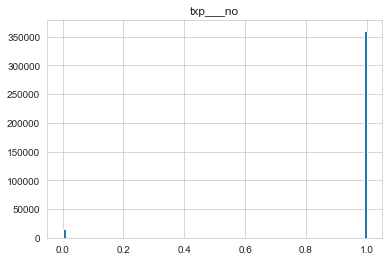

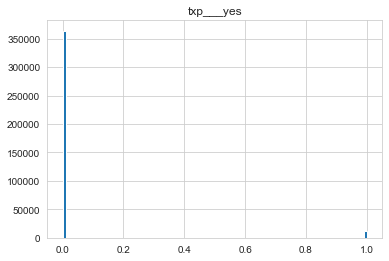

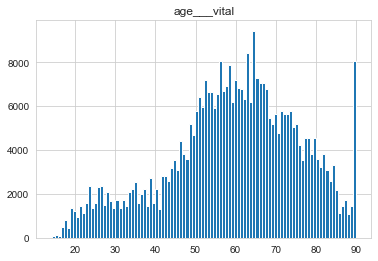

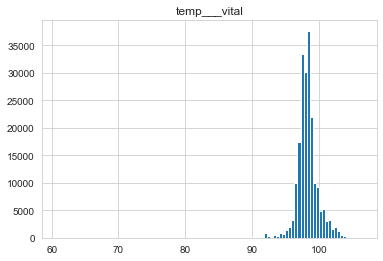

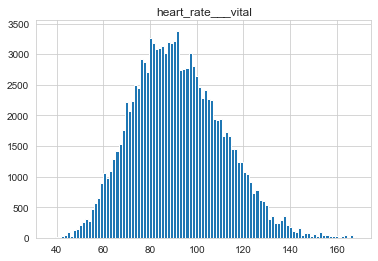

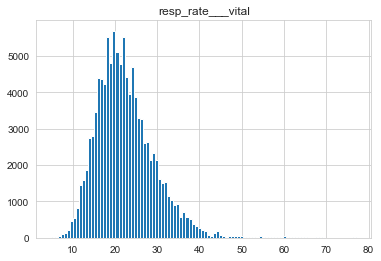

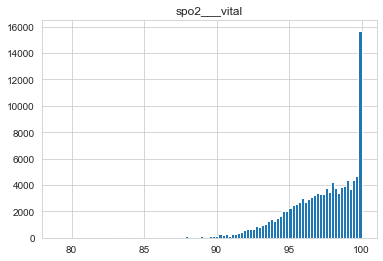

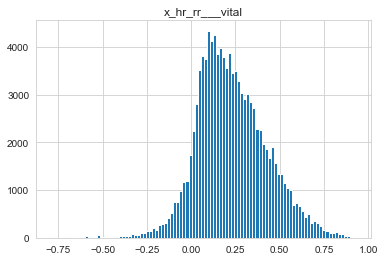

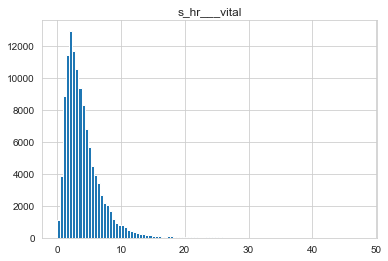

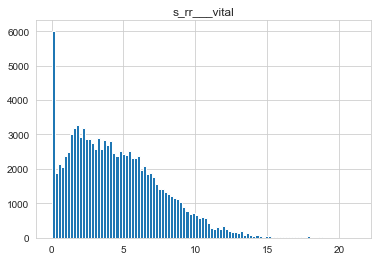

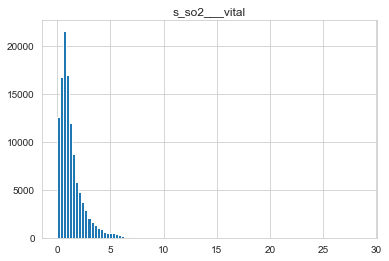

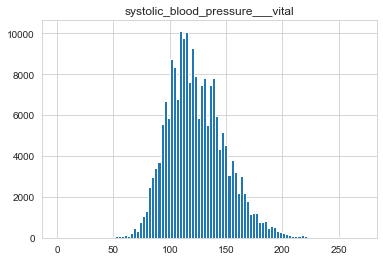

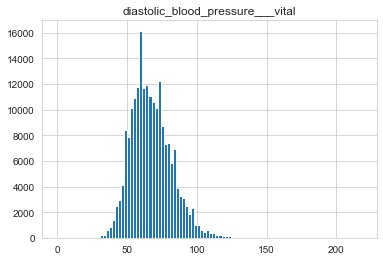

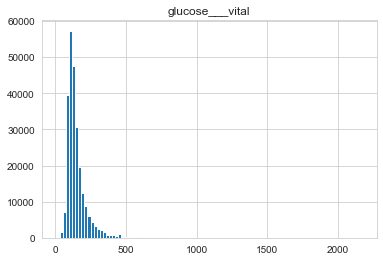

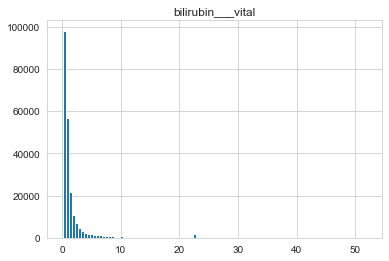

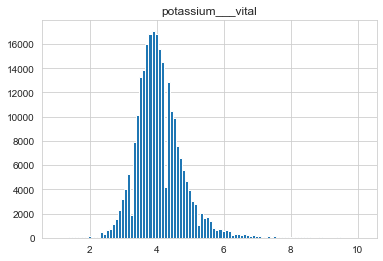

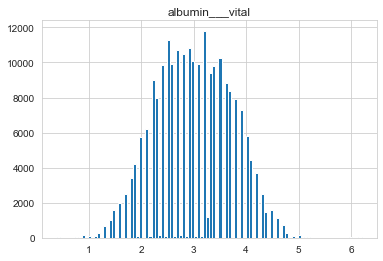

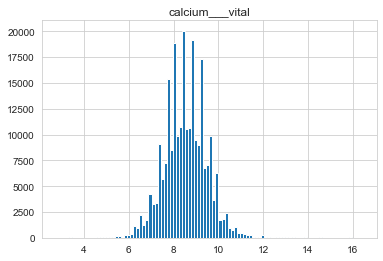

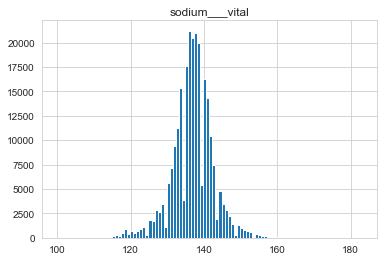

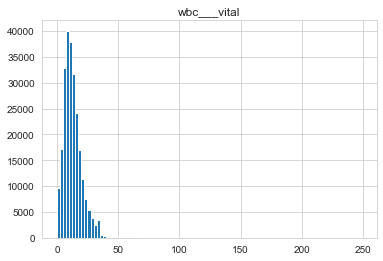

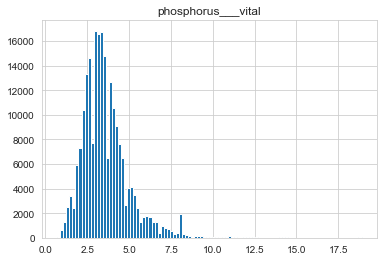

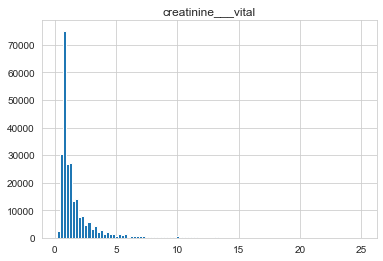

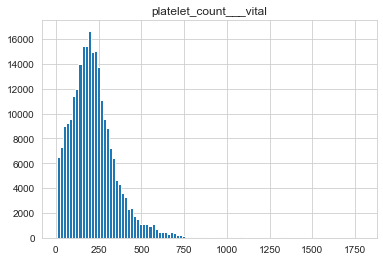

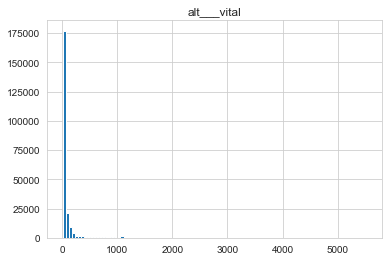

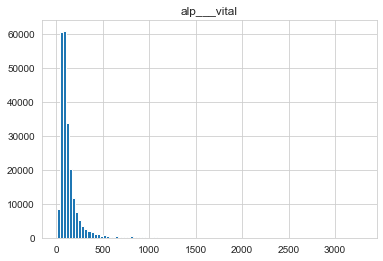

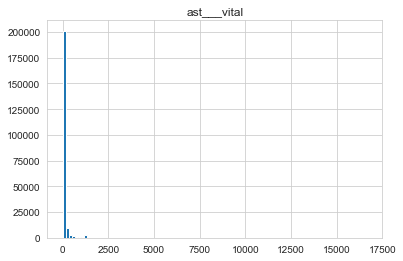

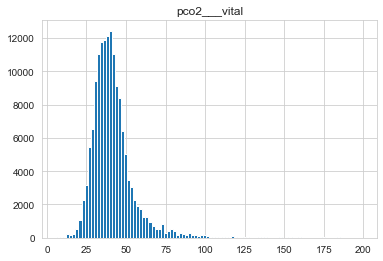

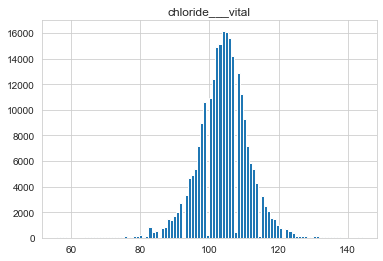

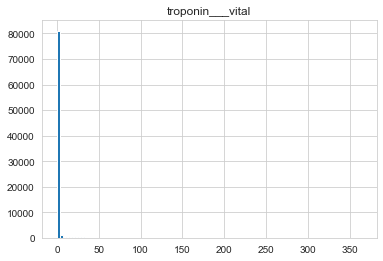

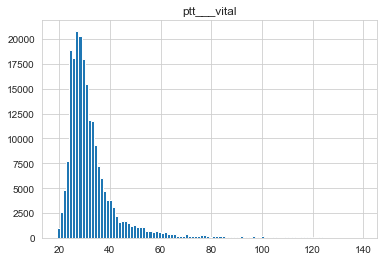

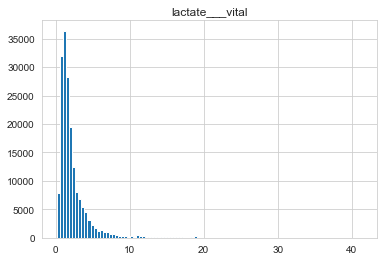

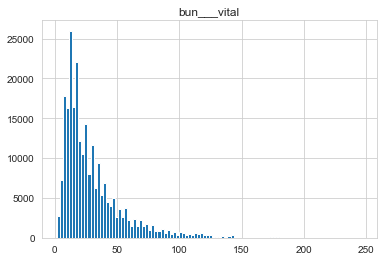

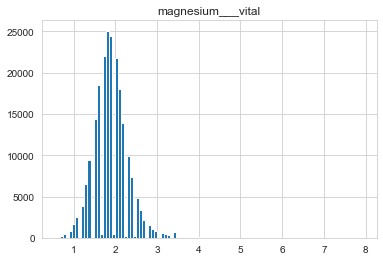

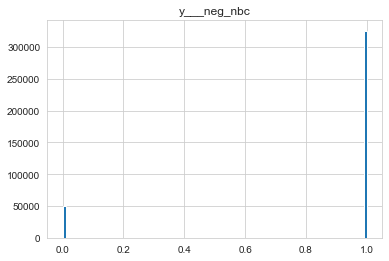

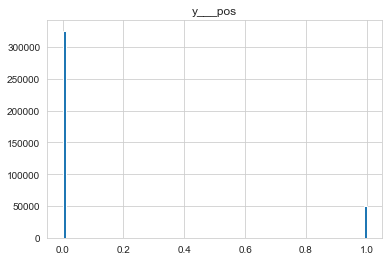

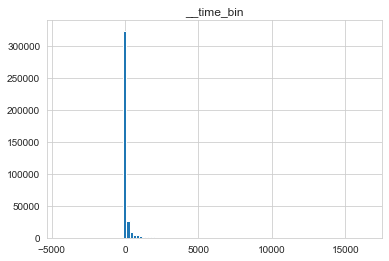

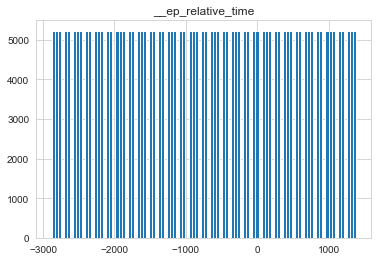

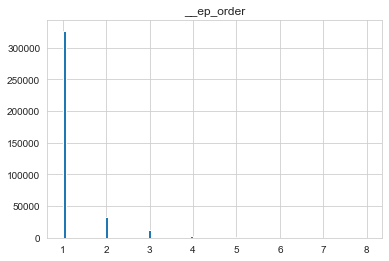

In [10]:
df = bsi_stream.engineer.train_df
for col in df.columns:
    try:
        df.hist(column=col, bins=100);
    except:
        pass

In [11]:
# save raw dataframe in a csv
bsi_stream.engineer.train_df.to_csv("./train_df.csv", index=False)
bsi_stream.engineer.valid_df.to_csv("./valid_df.csv", index=False)


## Model comparison

In [5]:
train_df = pd.read_csv("./train_df.csv")
valid_df = pd.read_csv("./valid_df.csv")

In [13]:
input_vars = ['txp___yes', 'age___vital', 'temp___vital', 'heart_rate___vital', 'resp_rate___vital', 'spo2___vital', 'x_hr_rr___vital', 's_hr___vital', 's_rr___vital', 's_so2___vital', 'systolic_blood_pressure___vital', 'diastolic_blood_pressure___vital', 'glucose___vital', 'bilirubin___vital', 'potassium___vital', 'albumin___vital', 'calcium___vital', 'sodium___vital', 'wbc___vital', 'phosphorus___vital', 'creatinine___vital', 'platelet_count___vital', 'alt___vital', 'alp___vital', 'ast___vital', 'pco2___vital', 'chloride___vital', 'troponin___vital', 'ptt___vital', 'lactate___vital', 'bun___vital', 'magnesium___vital']
output_var = ['y___pos']

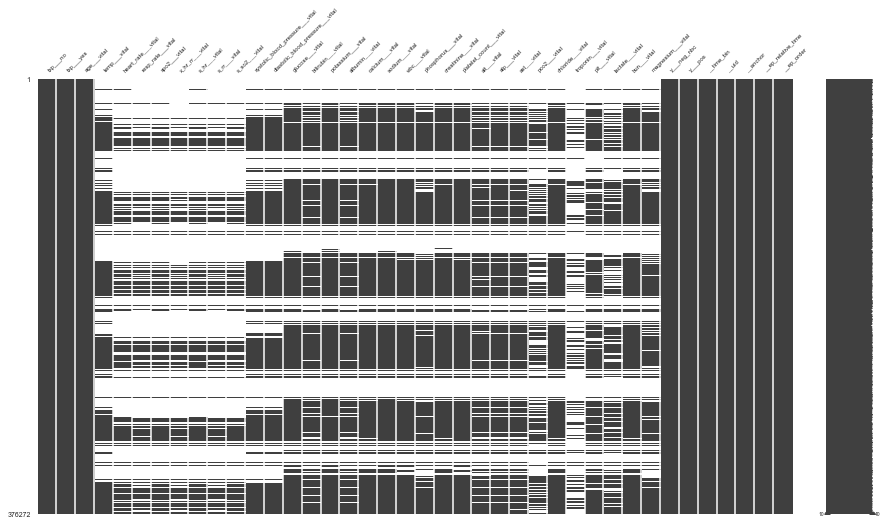

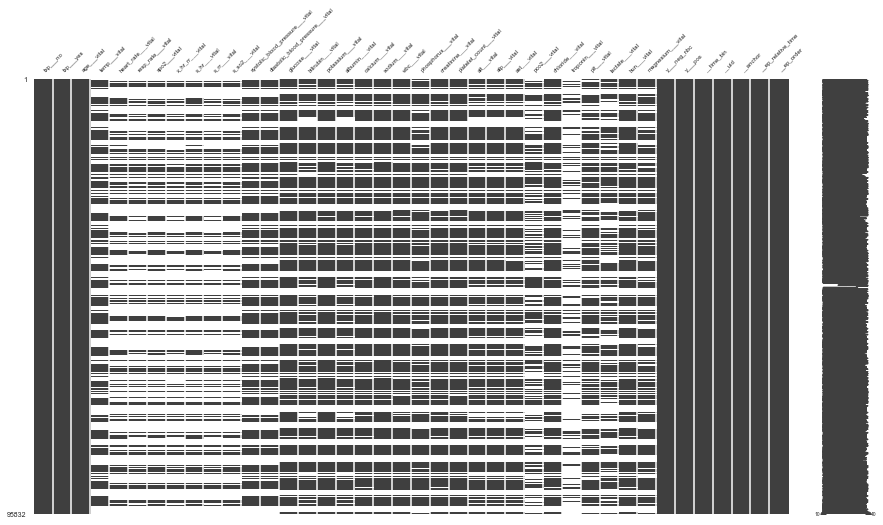

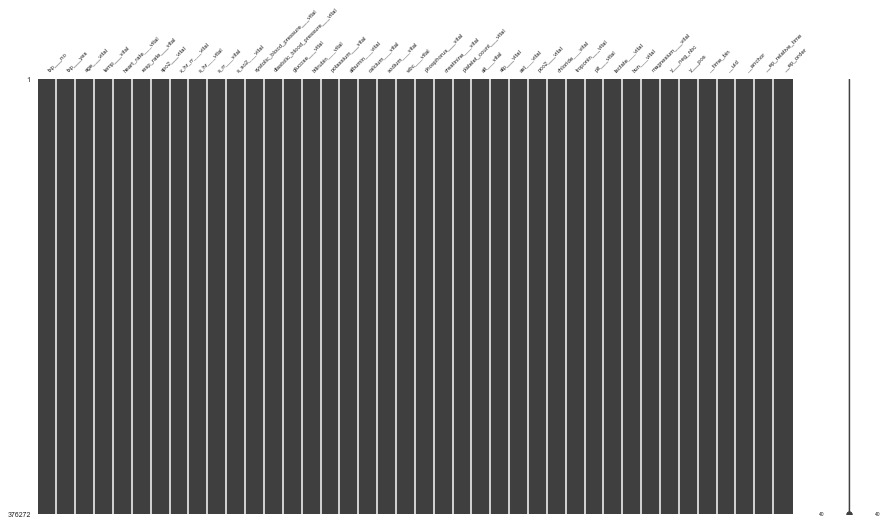

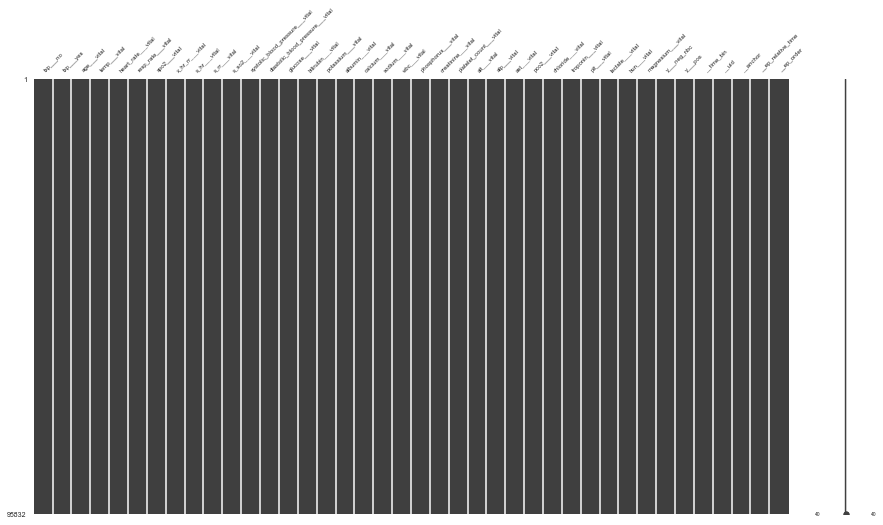

In [14]:
import missingno as msno
msno.matrix(train_df, figsize=[15, 8], fontsize=6);
msno.matrix(valid_df, figsize=[15, 8], fontsize=6);

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer
# median imputation
imputer = SimpleImputer(strategy='median')
imputer.fit(train_df[input_vars])
train_df[input_vars] = imputer.transform(train_df[input_vars])
valid_df[input_vars] = imputer.transform(valid_df[input_vars])

msno.matrix(train_df, figsize=[15, 8], fontsize=6);
msno.matrix(valid_df, figsize=[15, 8], fontsize=6);

In [25]:
# logistic regression in sklearn
import sklearn
from sklearn.linear_model import LogisticRegression

lr_mdl = LogisticRegression(solver='liblinear').fit(train_df[input_vars], train_df[output_var].values.ravel())
y_valid_pred = lr_mdl.predict_proba(valid_df[input_vars])
y_valid_true = valid_df[output_var].values.ravel()
sklearn.metrics.roc_auc_score(y_valid_true, y_valid_pred[:,1])

0.7041403458208224

In [30]:
# logistic regression in keras
myMetrics = [
    keras.metrics.AUC(name='AUROC', curve='ROC'),
    keras.metrics.AUC(name='AUPRC', curve='PR')
]
keras.backend.clear_session()
mdl = keras.models.Sequential([
    keras.layers.Input(train_df[input_vars].shape[1]),
    keras.layers.Dense(1, activation='sigmoid')
])
mdl.summary()
mdl.compile(loss="binary_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=1e-3), metrics = myMetrics)
callback = EarlyStopping(monitor='val_loss', patience=5)
his = mdl.fit(train_df[input_vars], train_df[output_var], 
              epochs=10, 
              validation_data=(valid_df[input_vars], valid_df[output_var]), callbacks=[callback])
keras.backend.set_value(mdl.optimizer.learning_rate, 1e-4)
his = mdl.fit(train_df[input_vars], train_df[output_var], 
              epochs=10, 
              validation_data=(valid_df[input_vars], valid_df[output_var]), callbacks=[callback])

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 33        
Total params: 33
Trainable params: 33
Non-trainable params: 0
_________________________________________________________________
Epoch 1/50
11759/11759 [==============================] - 10s 782us/step - loss: 1.7502 - AUROC: 0.5909 - AUPRC: 0.2014 - val_loss: 0.3686 - val_AUROC: 0.6721 - val_AUPRC: 0.2548
Epoch 2/50
11759/11759 [==============================] - 9s 781us/step - loss: 0.3957 - AUROC: 0.6486 - AUPRC: 0.2514 - val_loss: 0.3698 - val_AUROC: 0.6883 - val_AUPRC: 0.2516
Epoch 3/50
11759/11759 [==============================] - 9s 792us/step - loss: 0.3879 - AUROC: 0.6601 - AUPRC: 0.2628 - val_loss: 0.3704 - val_AUROC: 0.6855 - val_AUPRC: 0.2676
Epoch 4/50
11759/11759 [==============================] - 9s 802us/step - loss: 0.3891 - AUROC: 0.6652 - AUPRC: 0.2690 